In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
# %matplotlib inline

In [237]:
ad_file = './data/Advertising.csv'
SPLIT_RATIO = 0.3

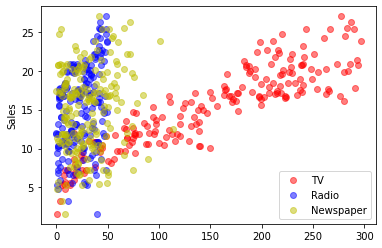

In [187]:
df = pd.read_csv(ad_file)
plt.scatter(df['TV'],df['Sales'],c='r',alpha=0.5,label='TV')
plt.scatter(df['Radio'],df['Sales'],c='b',alpha=0.5,label='Radio')
plt.scatter(df['Newspaper'],df['Sales'],c='y',alpha=0.5,label='Newspaper')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [241]:
print(df.info())
print('=====================================================')
print(df.describe())
print('=====================================================')
print(df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.

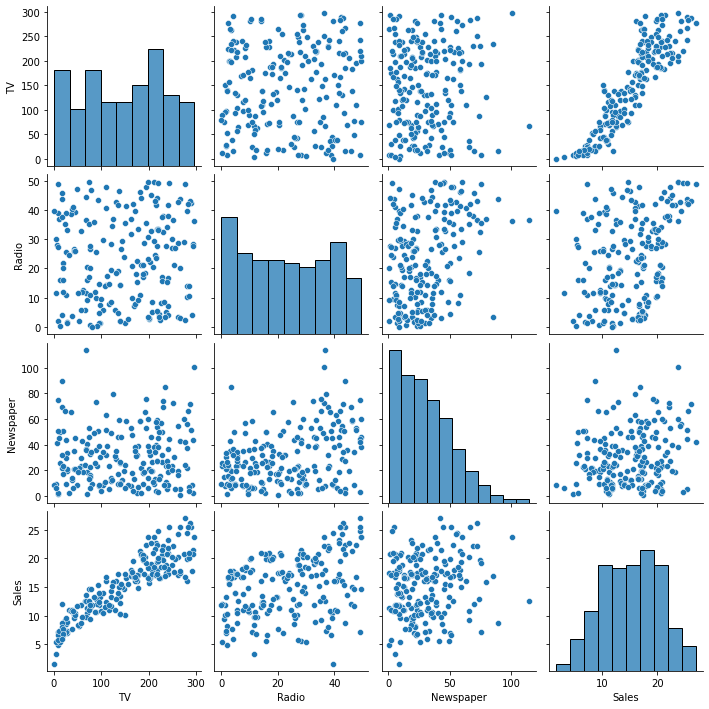

In [189]:
sns.pairplot(df)

In [238]:
def simple_linear_regression(X,y):
    n = 30
    coefs = np.zeros(n)
    mses = np.zeros(n*3).reshape(30,3)
    X_name,y_name=X.name,y.name
    X = X.values.reshape(-1, 1)
    print('===================',X_name,'-',y_name,'===================')
    for i in range(n):
        #split train and test set
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=SPLIT_RATIO,random_state=i)
        regr = linear_model.LinearRegression()
        #train the model by train set
        regr.fit(X_train,y_train)

        ##predict on whole set
        y_predict = regr.predict(X)
        #actually y_predict = intercept+coef*X
        
        y_train_predict = regr.predict(X_train)
        y_test_predict = regr.predict(X_test)
        mses[i]=[mean_squared_error(y, y_predict),mean_squared_error(y_train, y_train_predict)
                         ,mean_squared_error(y_test, y_test_predict)]
        if i==0:
            plt.scatter(X,y,c='r',alpha=0.5)
            plt.xlabel(X_name)
            plt.ylabel(y_name)
            plt.plot(X,y_predict)
            print('interpret=',regr.intercept_)
            print('coefficient=',regr.coef_)
            # The mean squared error
#             print('MSE: %.2f'% mean_squared_error(y_test, y_test_predict))
#             print('r2: %.2f' % r2_score(y_test, y_test_predict))
            print('MSE: %.2f'% mean_squared_error(y, y_predict))
            #The coefficient of determination: 1 is perfect prediction
            print('r2: %.2f' % r2_score(y, y_predict))
        coefs[i] = regr.coef_
    t,p = stats.ttest_1samp(coefs, 0)#检验coef和0的差别
    print(X_name,'-',y_name,': t=%e'%t)
    print(X_name,'-',y_name,': p=%e'%p)
    plt.show()
    #plot mses
    plt.plot(range(n),mses[:,0],c='r',label='total')
    plt.plot(range(n),mses[:,1],c='b',label='train')
    plt.plot(range(n),mses[:,2],c='m',label='test')
    plt.xlabel('the i-th iter')
    plt.ylabel('mse')
    plt.legend(loc='best')
    plt.show()

=================== TV - Sales ===================
interpret= 7.143822253515246
coefficient= [0.05473199]
MSE: 5.23
r2: 0.81
TV - Sales : t=1.985675e+02
TV - Sales : p=5.345025e-47


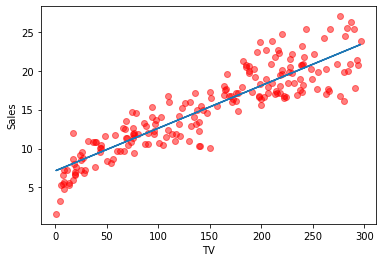

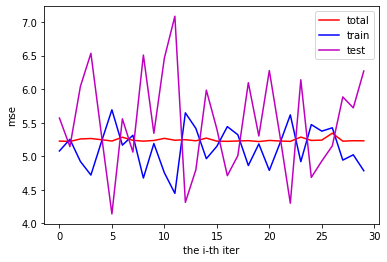

=================== Radio - Sales ===================
interpret= 12.611300408605203
coefficient= [0.12650322]
MSE: 24.56
r2: 0.12
Radio - Sales : t=3.896454e+01
Radio - Sales : p=1.339810e-26


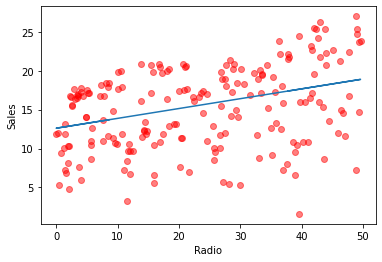

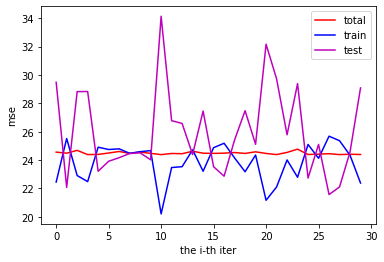

=================== Newspaper - Sales ===================
interpret= 13.984682815685323
coefficient= [0.05359133]
MSE: 27.44
r2: 0.01
Newspaper - Sales : t=1.466855e+01
Newspaper - Sales : p=5.969087e-15


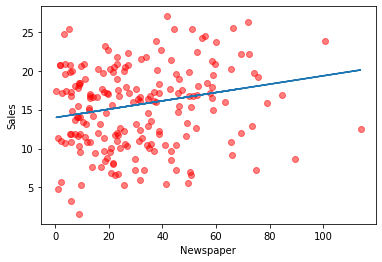

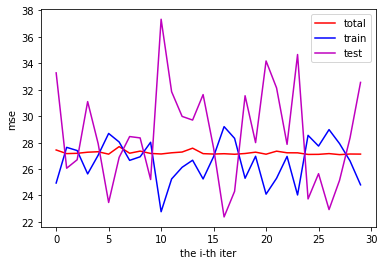

In [239]:
simple_linear_regression(df['TV'],df['Sales'])
simple_linear_regression(df['Radio'],df['Sales'])
simple_linear_regression(df['Newspaper'],df['Sales'])

In [205]:
def multi_linear_regression(X,y,e=26,a=30):
    X1_name,X2_name=X.columns
    y_name=y.name
    n=30
    coefs = np.zeros(60).reshape(30,2)
    
    print('==========',X1_name,'-',X2_name,'-',y_name,'===========')
    for i in range(n):
        regr = linear_model.LinearRegression()
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=SPLIT_RATIO,random_state=i)
        regr.fit(X_train,y_train)
        y_pred = regr.predict(X)
        if i==0:
            fig = plt.figure(figsize=(8, 8))
            ax = fig.gca(projection='3d', elev=e, azim=a)
            ax.scatter3D(X[X1_name],X[X2_name],y,c='r')
            xs,ys = np.meshgrid(X[X1_name],X[X2_name])
            zs = regr.intercept_+regr.coef_[0]*xs+regr.coef_[1]*ys
            ax.plot_surface(xs,ys,zs)
            ax.set_xlabel(X1_name)
            ax.set_ylabel(X2_name)
            ax.set_zlabel(y_name)
            #predict on test set
            y_t_predict = regr.predict(X_test)
            print('interpret=',regr.intercept_)
            print('coefficients=',regr.coef_)
            # The mean squared error
#             print('MSE: %.2f'% mean_squared_error(y_test, y_t_predict))
#             print('r2: %.2f'% r2_score(y_test, y_t_predict))
            print('MSE: %.2f'% mean_squared_error(y, y_pred))
            #The coefficient of determination: 1 is perfect prediction
            print('r2: %.2f' % r2_score(y, y_pred))
        coefs[i] = regr.coef_
    t,p = stats.ttest_1samp(coefs, 0)
    for i in range(t.shape[0]):
        print('β',i+1,'-t',i+1,'=%.4f'%t[i])
        print('β',i+1,'-p',i+1,'=%e'%p[i])
    plt.show()


========== TV - Radio - Sales ===========
interpret= 4.7019951358357925
coefficients= [0.05370674 0.11152129]
MSE: 2.72
r2: 0.90
β 1 -t 1 =263.7425
β 1 -p 1 =1.428918e-50
β 2 -t 2 =120.6760
β 2 -p 2 =9.831986e-41


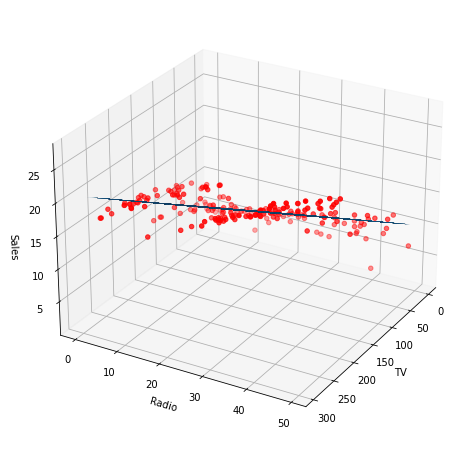

========== Radio - Newspaper - Sales ===========
interpret= 12.02994633352997
coefficients= [0.11509021 0.02882745]
MSE: 24.72
r2: 0.11
β 1 -t 1 =40.0103
β 1 -p 1 =6.300685e-27
β 2 -t 2 =3.3087
β 2 -p 2 =2.510102e-03


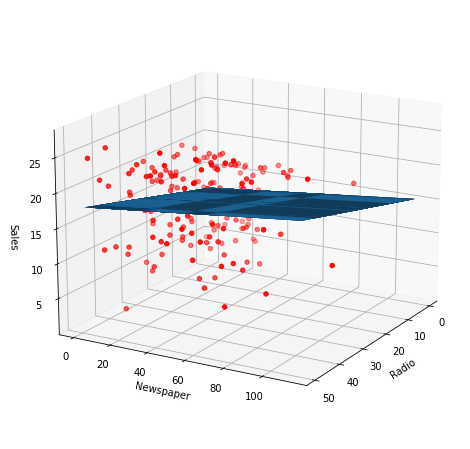

========== TV - Newspaper - Sales ===========
interpret= 6.511726859933232
coefficients= [0.05392591 0.02572029]
MSE: 4.92
r2: 0.82
β 1 -t 1 =210.9754
β 1 -p 1 =9.227358e-48
β 2 -t 2 =33.1326
β 2 -p 2 =1.334940e-24


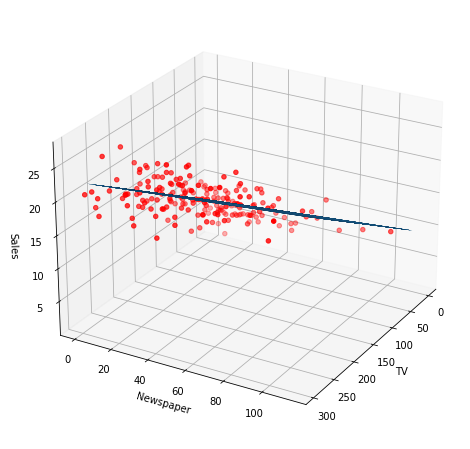

In [206]:
multi_linear_regression(df[['TV','Radio']],df['Sales'],26,30)
multi_linear_regression(df[['Radio','Newspaper']],df['Sales'],17,30)
multi_linear_regression(df[['TV','Newspaper']],df['Sales'],25,30)

In [195]:
X = df['TV']
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.params)
print(lr.summary())

y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)


# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

#res_test = y_test - y_pred


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('mse=',np.sqrt(mean_squared_error(y_test, y_pred)))

r_squared = r2_score(y_test, y_pred)
print('r2=',r_squared)


const    6.948683
TV       0.054546
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.52e-52
Time:                        09:36:14   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c